### IMPORT THE REQUIRED LIBRARIES FOR DATA LOADING, PRE-PROCESSING AND EDA

In [60]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import scale
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve, precision_score, recall_score
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils



import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Loading and checking the data set
diabetes=pd.read_csv("C:/Users/b1161681/OneDrive - Teesside University/2022 SESSION (SEMESTER 1)/Advanced Practice/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
#Changing the data types to integers
diabetes = diabetes.astype(int)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [5]:
diabetes.isnull().sum()
diabetes

Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0             0       0  ...              1   
1                          0             1       0  ...              0   
2                          0             0       1  ...              1   
3                          0             1       1  ...              1   
4                          0             1       1  ...              1   
...                      ...           ...     ...  ...            ...   
253675                     0             0       1  ...              1   
253676                     0             0       0  ...              1   
253677                     0             1       1  ...              1   
253678                     0             0       1  ...              1   
253679                     1             1       1  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0                 0        5        18        15         1    0    9   
1                 1        3         0         0         0    0    7   
2                 1        5        30        30         1    0    9   
3                 0        2         0         0         0    0   11   
4                 0        2         3         0         0    0   11   
...             ...      ...       ...       ...       ...  ...  ...   
253675            0        3         0         5         0    1    5   
253676            0        4         0         0         1    0   11   
253677            0        1         0         0         0    0    2   
253678            0        3         0         0         0    1    7   
253679            0        2         0         0         0    0    9   

        Education  Income  
0               4       3  
1               6       1  
2               4       8  
3               3       6  
4               5       4  
...           ...     ...  
253675          6       7  
253676          2       4  
253677          5       2  
253678          5       1  
253679          6       2  

[253680 rows x 22 columns]

In [6]:
diabetes.shape

(253680, 22)

In [7]:
# Selecting duplicate rows based on all columns
diabetes_dup = diabetes.duplicated().sum()
diabetes_dup

23899

In [8]:
#drop duplicated rows
diabetes.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [9]:
diabetes.shape

(229781, 22)

In [10]:
diabetes.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        0.325627       0.454441       0.441760       0.959535   
std         0.724623       0.497921       0.496598       0.197047   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  229781.00000  229781.000000  229781.000000         229781.000000   
mean       28.68567       0.465661       0.044756              0.103216   
std         6.78636       0.498821       0.206767              0.304241   
min        12.00000       0.000000       0.000000              0.000000   
25%        24.00000       0.000000       0.000000              0.000000   
50%        27.00000       0.000000       0.000000              0.000000   
75%        32.00000       1.000000       0.000000              0.000000   
max        98.00000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  229781.000000  229781.000000  ...  229781.000000  229781.000000   
mean        0.733355       0.612966  ...       0.946075       0.092810   
std         0.442206       0.487073  ...       0.225871       0.290167   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        2.601151       3.505373       4.675178       0.185507   
std         1.064685       7.713725       9.046568       0.388709   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         3.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       4.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  229781.000000  229781.000000  229781.000000  229781.000000  
mean        0.439231       8.086582       4.980568       5.890383  
std         0.496295       3.093809       0.992895       2.092477  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       6.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [11]:
diabetes = diabetes.rename(columns={"Diabetes_012": "DiabType"})

In [12]:
diabetes.nunique()

DiabType                 3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [14]:
#Visualizing using pandas profiling
profile = ProfileReport(diabetes, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

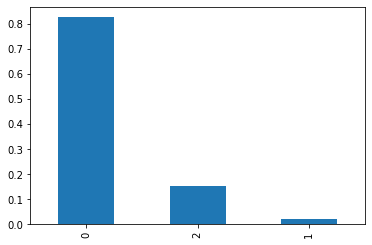

In [15]:
diabetes['DiabType'].value_counts(normalize=True).plot(kind='bar');

In [16]:
diabetes['DiabType'].value_counts()

0    190055
2     35097
1      4629
Name: DiabType, dtype: int64

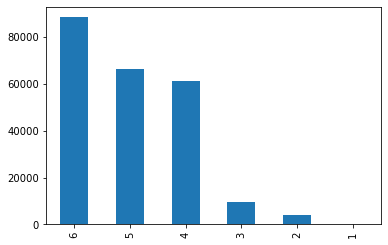

In [17]:

diabetes['Education'].value_counts().plot(kind='bar');

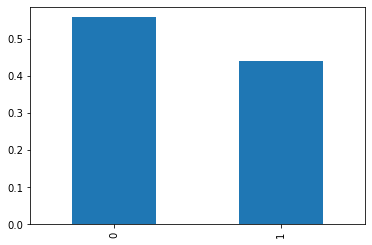

In [18]:
diabetes['HighChol'].value_counts(normalize=True).plot(kind='bar');


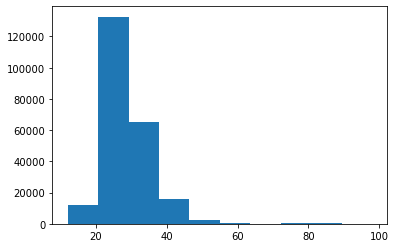

In [19]:
plt.hist(diabetes['BMI'], bins=10);

Text(0.5, 1.0, 'Correlation Heatmap')

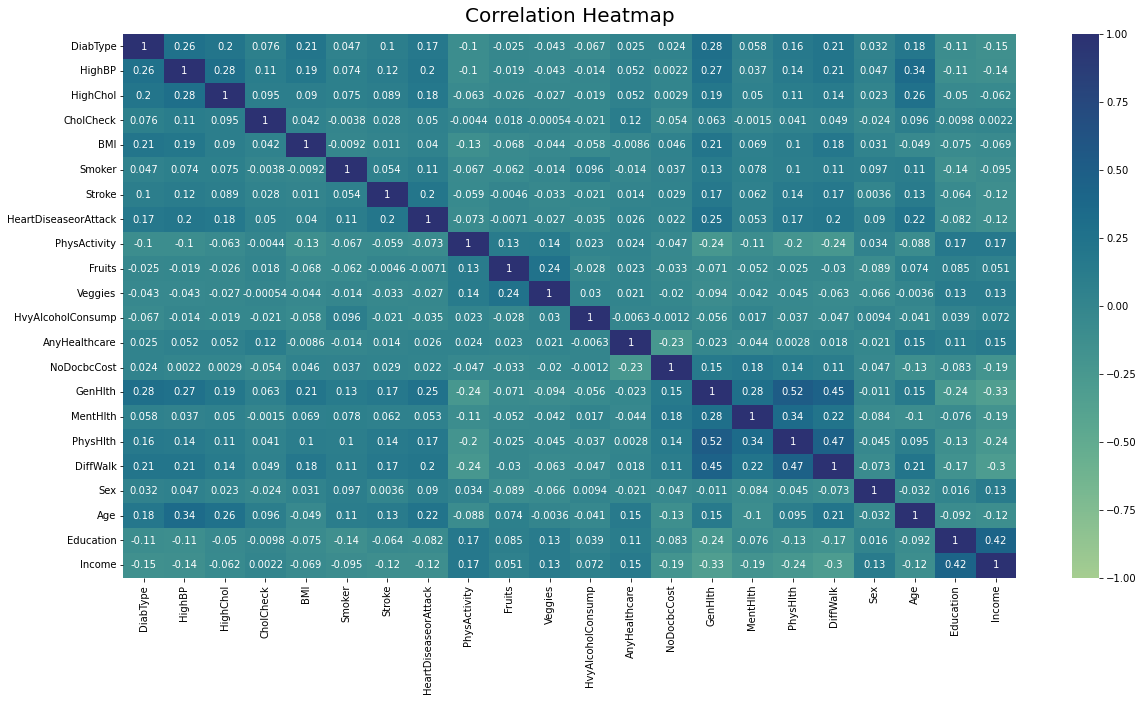

In [20]:
plt.figure(figsize = (20,10))
corr = diabetes.corr()
sns.heatmap(corr,  vmin = -1, vmax = 1, annot = True, cmap = "crest").set_title("Correlation Heatmap", fontdict = {"fontsize":20}, pad = 12)

**#Correlation heatmap show relation between columns (GenHlth ,PhysHlth ),(PhysHlth , DiffWalk),(GenHlth ,DiffWalk )are highly correleted with each other => positive relation
#(GenHlth ,Income ) , (DiffWalk , Income) are highly correleted with each other => Nagative relation**

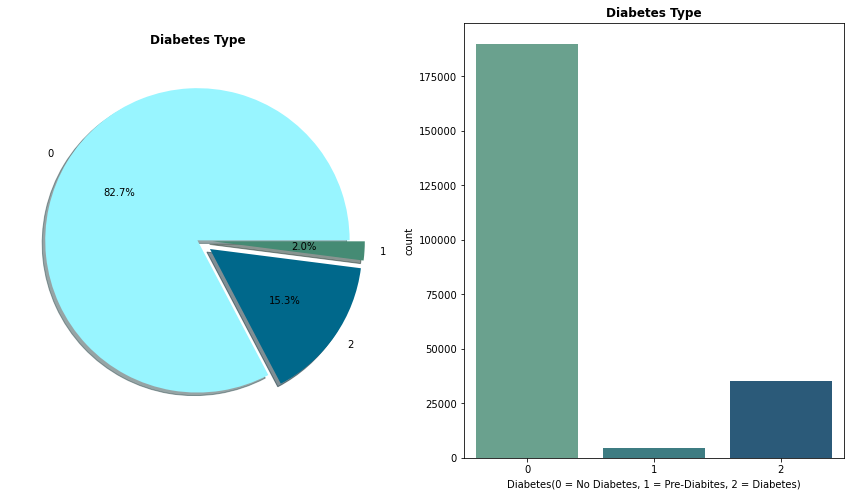

In [21]:
#PIE AND BAR PLOT OF DIABETES RATIO

color='#98F5FF','#00688B', '#458B74'
f,ax=plt.subplots(1,2,figsize=(15,8))
diabetes['DiabType'].value_counts().plot.pie(explode=[0,0.1,0.1],colors=color,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Diabetes Type',fontweight="bold")
ax[0].set_ylabel('')
sns.countplot('DiabType',data =diabetes, ax=ax[1],palette='crest')
ax[1].set_title('Diabetes Type',fontweight="bold")
plt.xlabel('Diabetes(0 = No Diabetes, 1 = Pre-Diabites, 2 = Diabetes)')
plt.show()

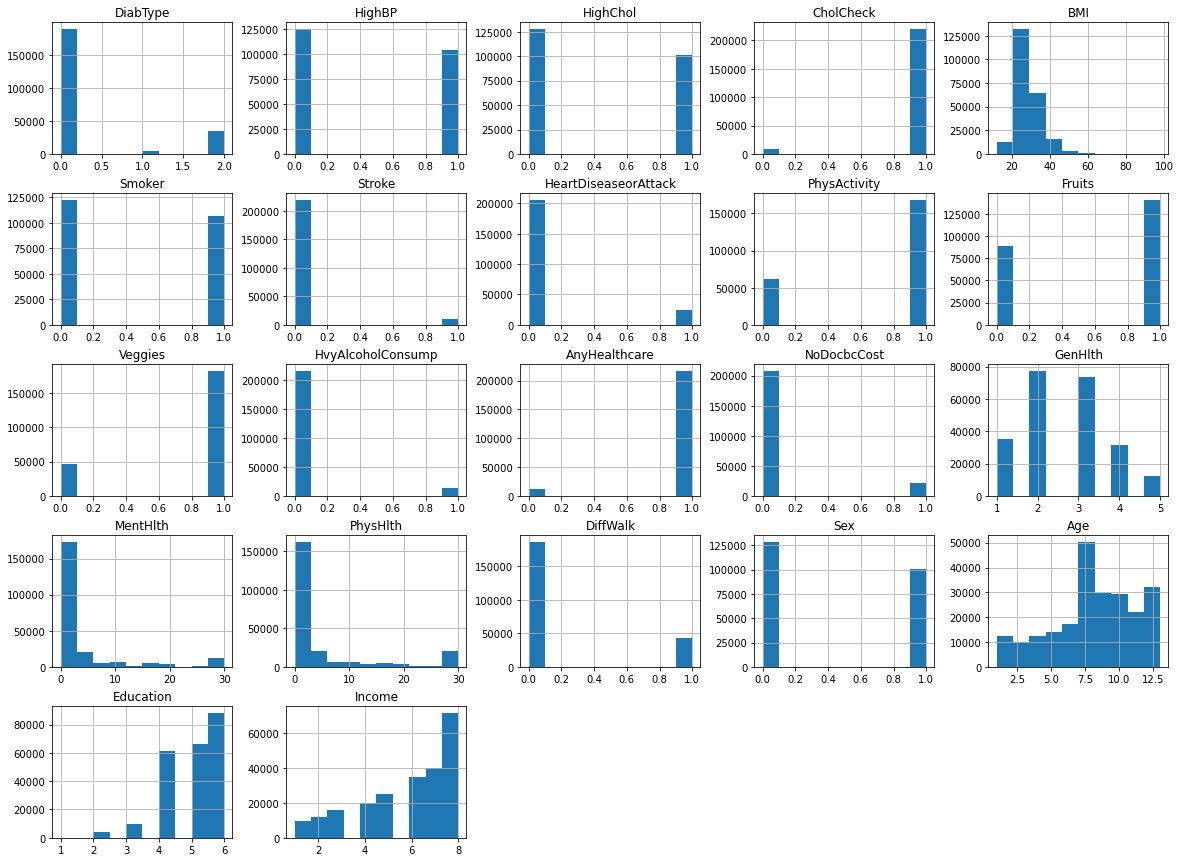

In [22]:
#Histogram of the factors of Diabetes
diabetes.hist(figsize=(20,15));

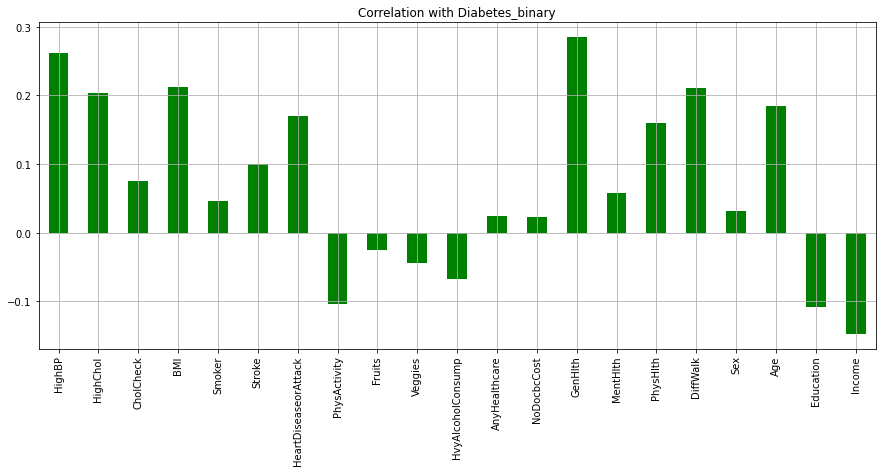

In [23]:
#Correlation OF OTHER FACTORS WITH DIABETES TYPE THROUGH BAR GRAPH

diabetes.drop('DiabType', axis=1).corrwith(diabetes.DiabType).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="green");



**Diabetes_binary's relation with other columns Through bar Graph Result:**

**Fruits, AnyHealthcare, NoDocbccost and sex are least correlated with Diabetes_binary.**

**HighBP, HighChol, BMI, smoker, stroke, HeartDiseaseorAttack, PhysActivity, Veggies, HvyAlcoholconsump, GenHlth, PhysHlth, Age, Education, Income and DiffWalk have a significant correlation with DiabetesType.**

### Distribution of diabetes among genders

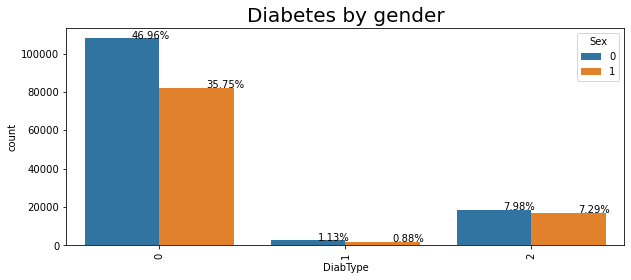

In [24]:
plt.figure(figsize=(10,4))
x= sns.countplot(x='DiabType',data=diabetes,hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

**Gender has no effect to developing diabetes**

**------------------------------------------------------------------------------------------------------------------------**

### EFFECT OF SMOKING and ALCOHOL CONSUMPTION (HvyAlcoholConsump') ON DIABETES

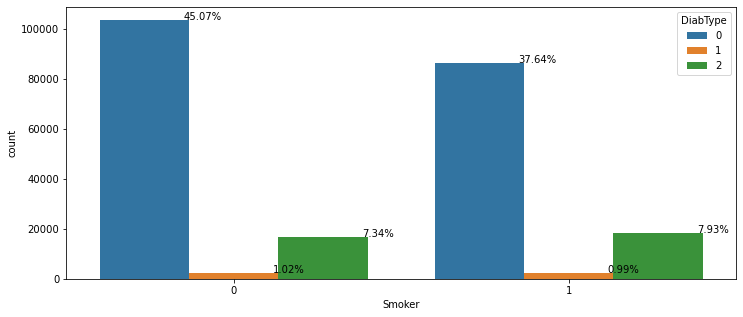

In [25]:
#SMOKER
plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='DiabType' , data = diabetes);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

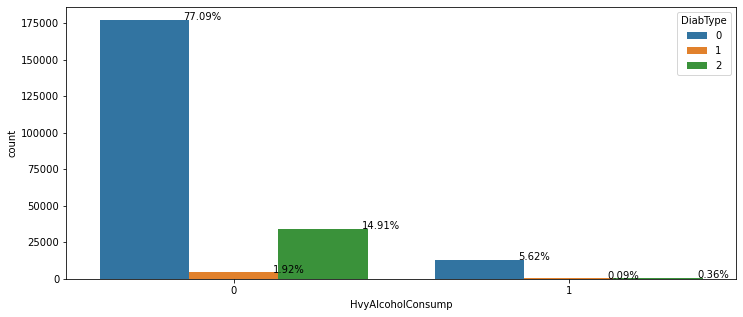

In [26]:
#Alcohol cosnumption
diabetes['HvyAlcoholConsump'].value_counts()
plt.figure(figsize=(12,5))

x= sns.countplot(x='HvyAlcoholConsump', hue='DiabType' , data = diabetes);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/diabetes.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

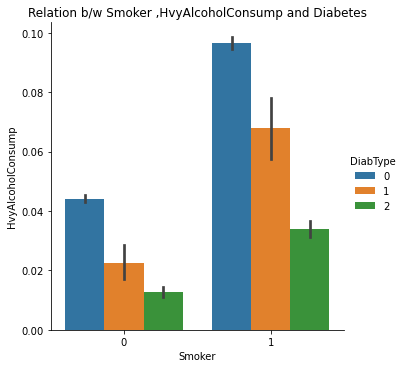

In [27]:
# (1 in Smoker is Yes), (1 in HvyAlcoholConsump is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)

sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = diabetes , hue="DiabType"  , kind="bar"  );  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

**Acording to this data, smoking and HvyAlcoholConsump both togEther increase the risk of diabetes.**

**-------------------------------------------------------------------------------------------------------------------------------------------**

### Cholesterol and High BP vs Diabetes

<AxesSubplot:xlabel='DiabType', ylabel='count'>

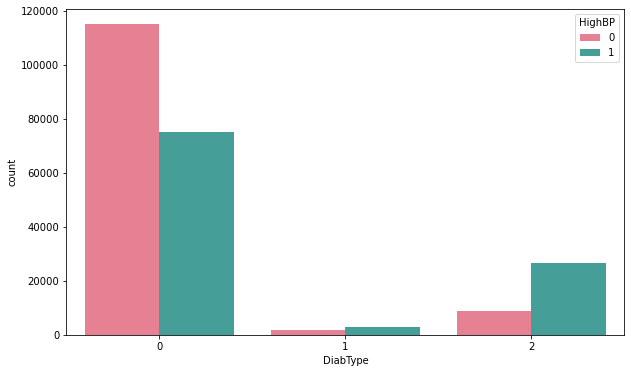

In [28]:
#High BP
plt.figure(figsize=(10,6))
sns.countplot(data=diabetes,x='DiabType',hue='HighBP',palette='husl')

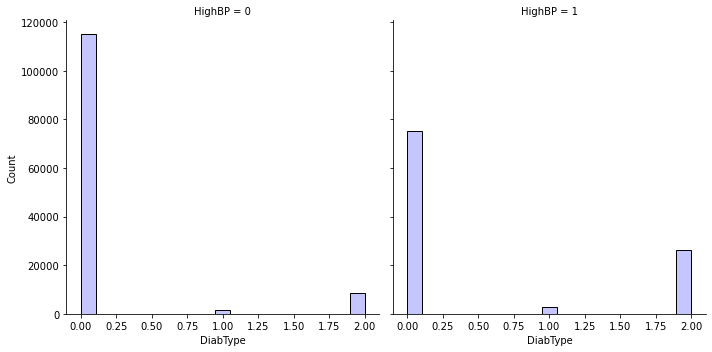

In [29]:
sns.displot(data=diabetes,x='DiabType',col='HighBP',color='#b3b3ff')

<AxesSubplot:xlabel='DiabType', ylabel='count'>

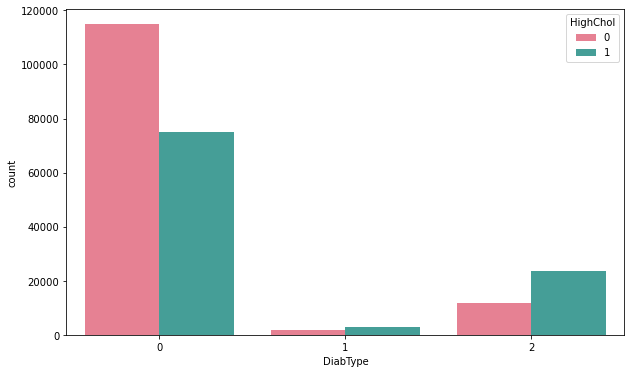

In [30]:
#HIGH CHOLESTEROL
plt.figure(figsize=(10,6))
sns.countplot(data=diabetes,x='DiabType',hue='HighChol',palette='husl')

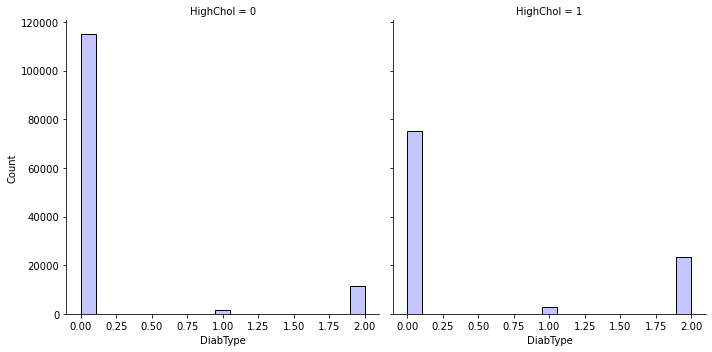

In [31]:
sns.displot(data=diabetes,x='DiabType',col='HighChol',color='#b3b3ff')

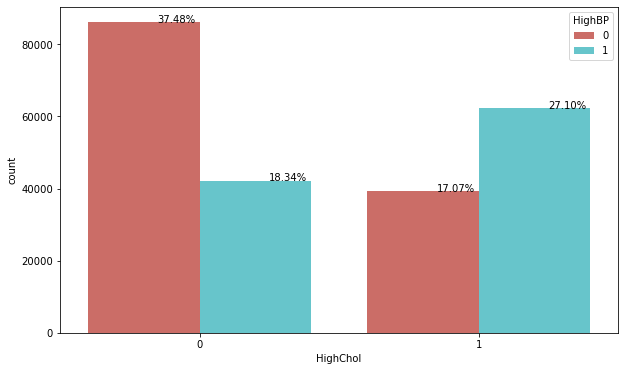

In [32]:
#Relationship of Highchol ans HighBp
plt.figure(figsize=(10,6))
x=sns.countplot(data=diabetes,x='HighChol',hue='HighBP',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format(i.get_height()/diabetes.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

**High cholesterol and high blood pressure are highly related to each other as people with high cholesterol tend to have high blodd pressure
The link between high blood pressure and high cholesterol goes in both directions. When the body can’t clear cholesterol from the bloodstream, that excess cholesterol can deposit along artery walls. When arteries become stiff and narrow from deposits, the heart has to work overtime to pump blood through them. This causes blood pressure to go up and up.**

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

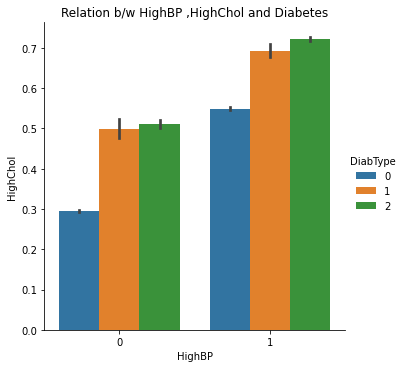

In [33]:
# (1 in HighBP is Yes), (1 in HighChol is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="HighBP" , y ="HighChol" , data = diabetes , hue="DiabType" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

**Acording to this data, HighBP and HighChol both togather increase the risk of diabetes.**

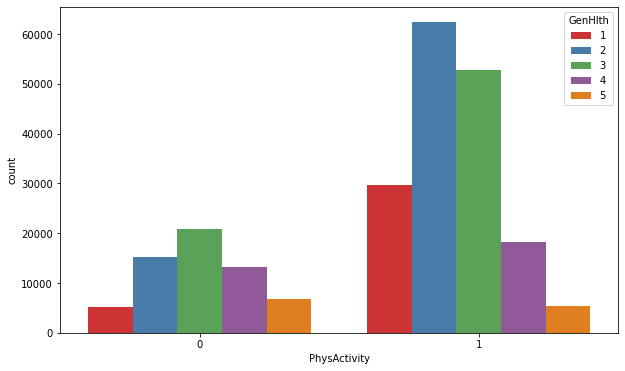

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=diabetes,x='PhysActivity',hue='GenHlth',palette='Set1');

**Physical activity dramitically affects the genral health as people who do physical have way better general health**

<Figure size 864x360 with 0 Axes>

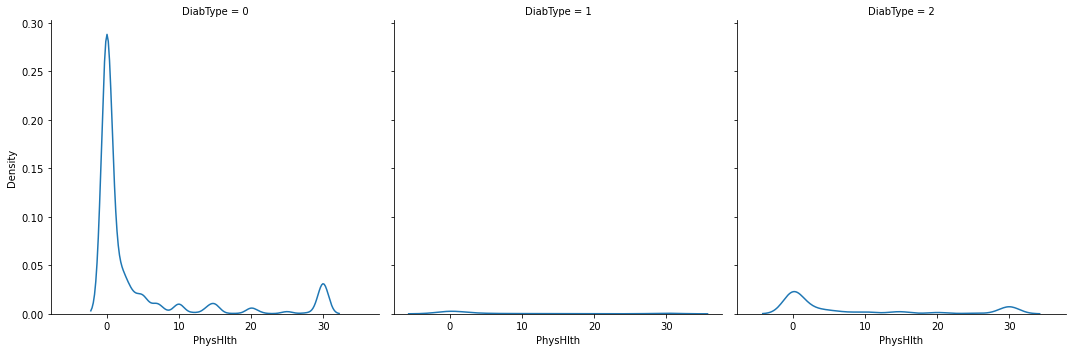

In [35]:
#Physical Health
plt.figure(figsize=(12,5))
sns.displot(x='PhysHlth', col='DiabType' , data = diabetes, kind="kde")
plt.show()

<Figure size 864x360 with 0 Axes>

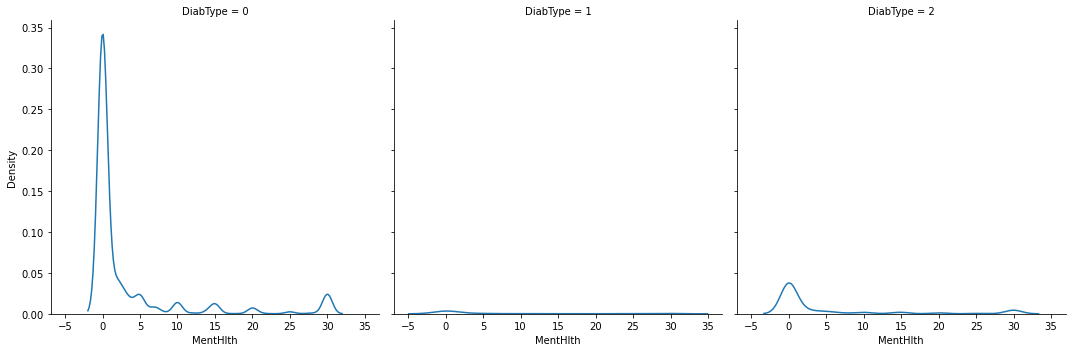

In [36]:
#MENTAL HEALTH
plt.figure(figsize=(12,5))
x= sns.displot(x='MentHlth', col='DiabType', data = diabetes, kind="kde")
plt.show()

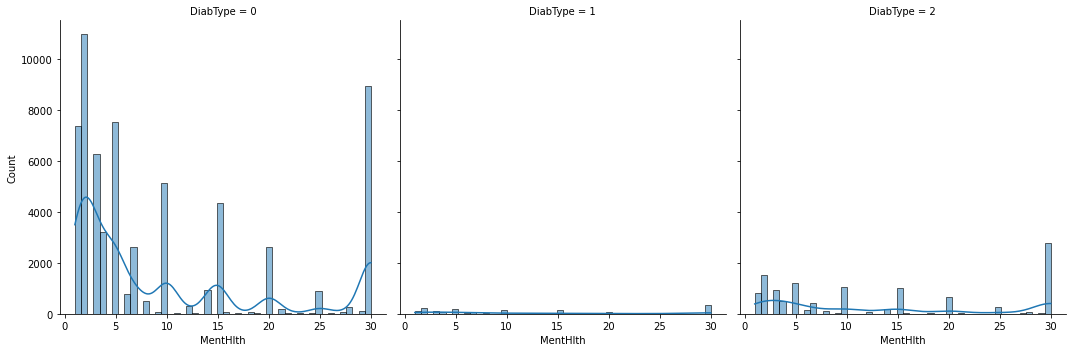

In [37]:
sns.displot(data=diabetes.loc[(diabetes['MentHlth']>0)&(diabetes['DiabType']!="No Diabetes")],x='MentHlth',col='DiabType',col_wrap=3,kde=True);

**Mental health doesn't seem to cause diabetes**

**MACHINE LEARNING ALGORITHMS**

In [38]:
y = diabetes['DiabType']
X = diabetes.drop(["DiabType"], axis = 1)

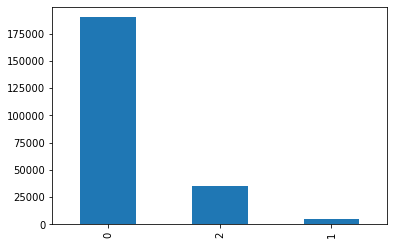

In [39]:
count=y.value_counts()
count.plot.bar()
plt.show()

In [40]:
#splitig the dataset into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(183824, 21) (183824,)
(45957, 21) (45957,)


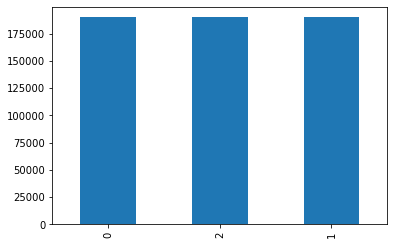

0    190055
2    190055
1    190055
Name: DiabType, dtype: int64

In [41]:
#oversampling the data
sampling=SMOTE()
X,y = sampling.fit_resample(X,y)
count=y.value_counts()
count.plot.bar()
plt.show()
count

In [42]:
#Applying RANDOM FOREST 
rfclassifier = RandomForestClassifier(random_state=42, n_estimators = 100, criterion = 'entropy')
rfclassifier.fit(X_train, y_train)
rfprediction = rfclassifier.predict(X_test)

In [43]:
#PRINT ACCURACY FOR Random Forest
print('Accuracy of Random Forest:', accuracy_score(rfprediction,y_test))

Accuracy of Random Forest: 0.8235742106751964


In [44]:
#Classification for rANDOM FORST 
print(classification_report(y_test,rfprediction))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     38064
           1       0.00      0.00      0.00       946
           2       0.45      0.19      0.26      6947

    accuracy                           0.82     45957
   macro avg       0.43      0.38      0.39     45957
weighted avg       0.77      0.82      0.79     45957



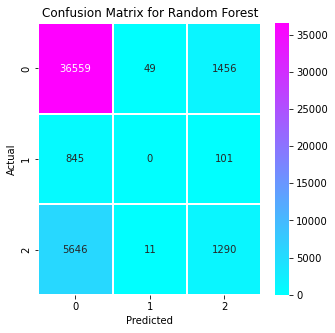

In [45]:
#print confusuion matrix
cofmrf = pd.crosstab(y_test.values, rfprediction, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cofmrf, fmt="d",
            xticklabels=['0', '1','2'],
            yticklabels=['0', '1','2'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="white",cmap="cool")
plt.title('Confusion Matrix for Random Forest', fontsize=12)
plt.show()

In [46]:
y_pred = rfclassifier.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      0   1     2    All
True                             
0          36559  49  1456  38064
1            845   0   101    946
2           5646  11  1290   6947
All        43050  60  2847  45957

In [47]:
#Hyperparameter Tuning for Random Forest
Hrf = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,30),
          'criterion' : ['gini','entropy'],
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,20),
          'min_samples_leaf' : sp_randint(1,20),
          'max_features' : sp_randint(2,18)}

rand_search_rfc = RandomizedSearchCV(rfclassifier, param_distributions=params, random_state=42, cv=10)

rand_search_rfc.fit(X_train,y_train)

rand_search_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 23}

In [51]:
# Passing best parameter for the Hyperparameter Tuning
hrfclassifier = RandomForestClassifier(**rand_search_rfc.best_params_, random_state=1)
Hrf.fit(X_train, y_train)
hyperpred =Hrf.predict(X_test)

In [52]:
print('Accuracy of hypertuned Random Forest Classifier: ',accuracy_score(y_test, hyperpred))

Accuracy of hypertuned Random Forest Classifier:  0.8248145005113475


In [53]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,hyperpred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     38064
           1       0.00      0.00      0.00       946
           2       0.46      0.19      0.27      6947

    accuracy                           0.82     45957
   macro avg       0.44      0.38      0.39     45957
weighted avg       0.77      0.82      0.79     45957



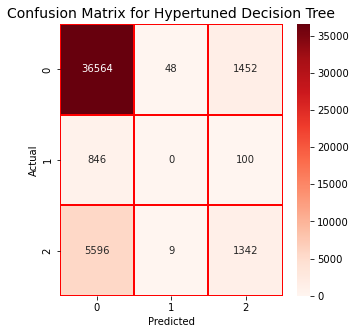

In [54]:
#Print Confusuion Matrix of hypertuned decision tree
cfdt1 = pd.crosstab(y_test.values, hyperpred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax2) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cfdt1, fmt = "d",
            xticklabels=['0', '1','2'],
            yticklabels=['0', '1','2'],
            annot=True,ax=ax2,
            linewidths=.2,linecolor="Red", cmap="Reds")
plt.title('Confusion Matrix for Hypertuned Decision Tree', fontsize=14)
plt.show()

In [57]:
Models = ["KNearest_Neighbors", "Neural_Network"]

classifiers = [
    KNeighborsClassifier(5),
    MLPClassifier(alpha=1, max_iter=1000)]

In [61]:
scores = {}
models = {}
for model in classifiers:
    model.fit(X_train, y_train)
    models[model] = model
    y_pred = model.predict(X_test)
    scores["Accuracy"] = scores.get("Accuracy", []) + [accuracy_score(y_test, y_pred)]
    scores["Precision"] = scores.get("Precision", []) + [precision_score(y_test, y_pred, average = "macro")]
    scores["Recall"] = scores.get("Recall", []) + [recall_score(y_test, y_pred, average = "macro")]
    scores["F1"] = scores.get("F1", []) + [f1_score(y_test, y_pred, average = "macro")]
    #scores["AUC"] = scores.get("AUC", []) + [roc_auc_score(y_test, y_pred, average = "micro", multi_class="ovr")]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
results = pd.DataFrame(data=scores, index=Models)
results

Accuracy  Precision    Recall        F1
KNearest_Neighbors  0.813869   0.446293  0.382217  0.388390
Neural_Network      0.834019   0.462788  0.385509  0.393572

In [63]:
# define the keras (cnn) model
model = Sequential()
model.add(Dense(12, input_dim=21, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [64]:
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [65]:
# fit the keras model on the dataset

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
5745/5745 [==============================] - 7s 1ms/step - loss: 0.4546 - accuracy: 0.6053 - val_loss: 0.4375 - val_accuracy: 0.5939
Epoch 2/100
5745/5745 [==============================] - 7s 1ms/step - loss: 0.4390 - accuracy: 0.5846 - val_loss: 0.4354 - val_accuracy: 0.4468
Epoch 3/100
5745/5745 [==============================] - 6s 1ms/step - loss: 0.4365 - accuracy: 0.4569 - val_loss: 0.4321 - val_accuracy: 0.3057
Epoch 4/100
5745/5745 [==============================] - 6s 1ms/step - loss: 0.4346 - accuracy: 0.3369 - val_loss: 0.4288 - val_accuracy: 0.3715
Epoch 5/100
5745/5745 [==============================] - 6s 1ms/step - loss: 0.4339 - accuracy: 0.2976 - val_loss: 0.4318 - val_accuracy: 0.3124
Epoch 6/100
5745/5745 [==============================] - 6s 1ms/step - loss: 0.4332 - accuracy: 0.2892 - val_loss: 0.4277 - val_accuracy: 0.3380
Epoch 7/100
5745/5745 [==============================] - 7s 1ms/step - loss: 0.4325 - accuracy: 0.2807 - val_loss: 0.4296 - val_ac

In [66]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

5745/5745 [==============================] - 5s 853us/step - loss: 0.4258 - accuracy: 0.7108
Accuracy: 71.08
